In [26]:
# KPCA Kernel-PCA

from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def RBF_KPCA(X, gamma, n_components):
    """RBF Kernel PCA
    
    Parameter
    ---------
    X: Ndarray, shape = [n_examples, n_features]
    
    gamma: float
        Tuning parameter of the RBF kernel
    
    n_components: int
        Number of principal components to return
    
    Return
    ------
    K_top_vectors: Ndarray, shape = [n_examples, k_features]
        Projected dataset

    K_top_values: Ndarray, shape = [n_examples]
    
    """

    # calculate pairwise squared Euclidean distances
    # in a MxN dimensional dataset
    square_distance = pdist(X, 'sqeuclidean')

    # convert pairwise distance into a square matrix
    square_distance_matrix = squareform(square_distance)

    # compute symmetrix kernel matrix
    K = exp(-gamma * square_distance_matrix)

    # center kenerl matrix
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtain eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigen_values, eigen_vectors = eigh(K)
    eigen_values, eigen_vectors = eigen_values[::-1], eigen_vectors[:, ::-1]

    # Collect top K eigen vectors (projected examples)
    K_top_vectors = np.column_stack([eigen_vectors[:, i] for i in range(n_components)])
    
    # Collect top K eigen values
    K_top_values = [eigen_values[i] for i in range(n_components)]
    
    return K_top_vectors, K_top_values

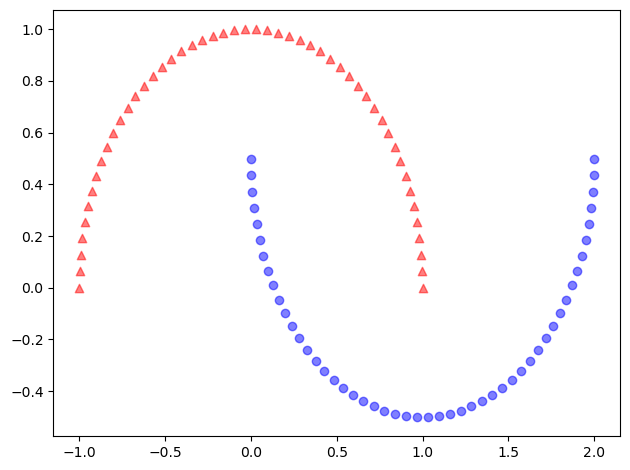

In [27]:
# set up non-linear dataset
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X, y = make_moons(n_samples=100, random_state=1)
plt.scatter(X[y==0, 0], X[y==0, 1], 
            color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], 
            color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\12923\AppData\Local\Temp\ipykernel_11860\2289182746.py:38: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = exp(-gamma * square_distance_matrix)


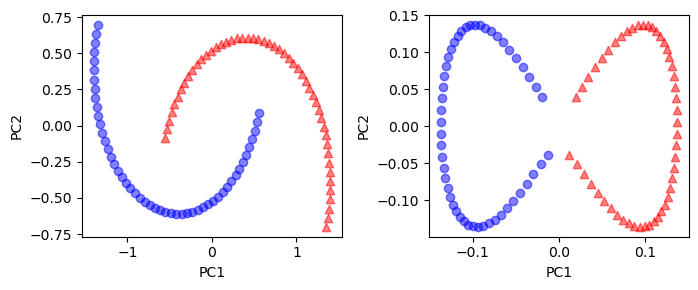

In [28]:
# compare KPCA with PCA on classifing non-linear dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)
x_kpca, x_kpca_v = RBF_KPCA(X, gamma=15, n_components=2)

# visualization
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(x_pca[y==0, 0], x_pca[y==0, 1], 
              color='red', marker='^', alpha=0.5)
ax[0].scatter(x_pca[y==1, 0], x_pca[y==1, 1], 
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(x_kpca[y==0, 0], x_kpca[y==0, 1], 
              color='red', marker='^', alpha=0.5)
ax[1].scatter(x_kpca[y==1, 0], x_kpca[y==1, 1], 
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
plt.tight_layout()
plt.show()

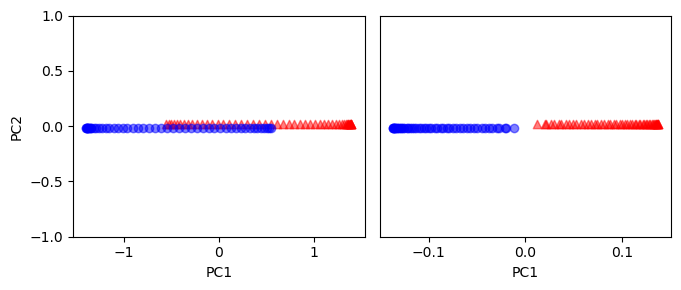

In [29]:
# project dataset onto a single dimension to see if is linearly seperable
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(x_pca[y==0, 0], np.zeros((50, 1)) + 0.02, 
              color='red', marker='^', alpha=0.5)
ax[0].scatter(x_pca[y==1, 0], np.zeros((50, 1)) - 0.02, 
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(x_kpca[y==0, 0], np.zeros((50, 1)) + 0.02, 
              color='red', marker='^', alpha=0.5)
ax[1].scatter(x_kpca[y==1, 0], np.zeros((50, 1)) - 0.02, 
              color='blue', marker='o', alpha=0.5)
ax[0].set_ylim([-1, 1])
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_xlabel('PC1')
ax[1].set_yticks([])
plt.tight_layout()
plt.show()

In [36]:
# update: project new data to new space

# we see KPCA return the projected eigen vectors
# so wo cannot update throught it, we should modify
# our function for updating
# -------------------------
# See Above!

# we assume the 26th samples are the 'new' sample waiting for projected
x_new = X[25]
x_proj = x_kpca[25]

# construct our new projection function
def update_projection_KPCA(x_new, X, gamma, e_vectors, e_values):
    pair_distance = np.array([np.sum((x_new-row)**2) for row in X])
    k = np.exp(-gamma * pair_distance)
    return k.dot(e_vectors / e_values)

x_reproj = update_projection_KPCA(x_new, X, gamma=15, e_vectors=x_kpca, e_values=x_kpca_v)
print(f"x_new: {x_new} \nx_projected: {x_proj} \nx_reprojected: {x_reproj}")

x_new: [-0.6234898   0.78183148] 
x_projected: [0.11322075 0.1292793 ] 
x_reprojected: [0.11322075 0.12918931]
